In [1]:
# Dataframe and Plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, log_loss, mean_absolute_error, mean_squared_error, recall_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import log_loss
from sklearn.linear_model import Ridge
import lightgbm as lgb

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
# from google.colab import files
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import os
#from multiprocessing import Pool
from multiprocess import Pool
from pathlib import Path

from catboost import CatBoostRegressor
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters
from functools import partial
from pathlib import Path
import tqdm
from tqdm import tqdm_notebook
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.impute import KNNImputer
from math import sin, cos, sqrt, atan2, radians

In [2]:
def recall(y_pred, data):
    """An eval metric that always returns the same value"""
    metric_name = 'RECALL'
    y_true = np.array(data.get_label())
    y_pred = np.array(y_pred).reshape(len(np.unique(y_true)), -1)
    
    #print (y_true.shape, y_pred.shape)
    y_pred = np.argmax(y_pred, axis = 0)
    #print (y_true.shape, y_pred.shape)

    #print (y_pred)
    value = recall_score(y_true, y_pred, average="macro", zero_division=0)
    is_higher_better = True
    return metric_name, value, is_higher_better

In [3]:
nd_cols = ['nd_mean_2021-04-15',
       'nd_mean_2021-04-16', 'nd_mean_2021-04-18', 'nd_mean_2021-04-19',
       'nd_mean_2021-04-20', 'nd_mean_2021-04-22', 'nd_mean_2021-04-23',
       'nd_mean_2021-04-25', 'nd_mean_2021-04-26', 'nd_mean_2021-04-27',
       'nd_mean_2021-04-28', 'nd_mean_2021-04-29', 'nd_mean_2021-04-30',
       'nd_mean_2021-05-01', 'nd_mean_2021-05-02', 'nd_mean_2021-05-03',
       'nd_mean_2021-05-04', 'nd_mean_2021-05-07', 'nd_mean_2021-05-08',
       'nd_mean_2021-05-09', 'nd_mean_2021-05-10', 'nd_mean_2021-05-15',
       'nd_mean_2021-05-16', 'nd_mean_2021-05-17', 'nd_mean_2021-05-19',
       'nd_mean_2021-05-20', 'nd_mean_2021-05-21', 'nd_mean_2021-05-24',
       'nd_mean_2021-05-26', 'nd_mean_2021-05-27', 'nd_mean_2021-05-29',
       'nd_mean_2021-06-02', 'nd_mean_2021-06-03', 'nd_mean_2021-06-04',
       'nd_mean_2021-06-05', 'nd_mean_2021-06-06', 'nd_mean_2021-06-07',
       'nd_mean_2021-06-09', 'nd_mean_2021-06-10', 'nd_mean_2021-06-12',
       'nd_mean_2021-06-13', 'nd_mean_2021-06-16', 'nd_mean_2021-06-18',
       'nd_mean_2021-06-19', 'nd_mean_2021-06-20', 'nd_mean_2021-06-22',
       'nd_mean_2021-06-25', 'nd_mean_2021-06-27', 'nd_mean_2021-06-28',
       'nd_mean_2021-07-04', 'nd_mean_2021-07-05', 'nd_mean_2021-07-07',
       'nd_mean_2021-07-08', 'nd_mean_2021-07-09', 'nd_mean_2021-07-13',
       'nd_mean_2021-07-15', 'nd_mean_2021-07-17', 'nd_mean_2021-07-20',
       'nd_mean_2021-07-26', 'nd_mean_2021-07-27', 'nd_mean_2021-07-29',
       'nd_mean_2021-07-31', 'nd_mean_2021-08-01', 'nd_mean_2021-08-07',
       'nd_mean_2021-08-10', 'nd_mean_2021-08-11', 'nd_mean_2021-08-12',
       'nd_mean_2021-08-13', 'nd_mean_2021-08-23', 'nd_mean_2021-08-27']

In [4]:
train = pd.read_csv('train_dataset_train.csv')
test = pd.read_csv('test_dataset_test.csv')
sample_sub = pd.read_csv('sample_solution.csv')
test['crop'] = -1

In [5]:
train.head()

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-16,nd_mean_2021-05-17,nd_mean_2021-05-21,nd_mean_2021-05-26,nd_mean_2021-05-27,nd_mean_2021-05-29,nd_mean_2021-06-06,nd_mean_2021-06-09,nd_mean_2021-06-13,nd_mean_2021-06-16,nd_mean_2021-06-18,nd_mean_2021-06-19,nd_mean_2021-06-20,nd_mean_2021-06-22,nd_mean_2021-06-25,nd_mean_2021-06-27,nd_mean_2021-07-07,nd_mean_2021-07-08,nd_mean_2021-07-09,nd_mean_2021-07-13,nd_mean_2021-07-15,nd_mean_2021-07-17,nd_mean_2021-07-20,nd_mean_2021-07-26,nd_mean_2021-07-27,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-07,nd_mean_2021-08-12,.geo,nd_mean_2021-04-15,nd_mean_2021-04-18,nd_mean_2021-04-25,nd_mean_2021-04-27,nd_mean_2021-04-29,nd_mean_2021-04-30,nd_mean_2021-06-07,nd_mean_2021-06-12,nd_mean_2021-06-28,nd_mean_2021-08-01,nd_mean_2021-08-11,nd_mean_2021-05-01,nd_mean_2021-05-03,nd_mean_2021-05-10,nd_mean_2021-05-15,nd_mean_2021-06-02,nd_mean_2021-06-03,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-04-20,nd_mean_2021-04-23,nd_mean_2021-05-09,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop
0,3536,20,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,0.000000,0.484102,0.201013,0.029708,0.397833,0.384805,0.015936,0.007275,0.441994,0.172777,0.000000,0.412072,0.507029,0.490741,0.549791,0.460996,0.100555,0.706968,0.691171,0.711135,0.731325,0.718093,0.000000,0.147169,0.728053,0.112933,0.727516,0.000000,0.000000,0.658016,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",0.187150,0.262300,0.077577,0.000476,0.000000,0.000000,0.111821,0.038902,0.155038,0.754859,0.000000,0.121799,0.083970,0.213006,0.358304,0.271128,0.173833,0.014060,0.030883,0.034858,0.063134,0.000000,0.102757,0.425571,0.108999,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,3
1,3739,45,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,0.163340,0.519456,0.501486,0.047332,0.448796,0.692873,0.628463,0.016747,0.000000,0.059826,0.000000,0.492250,0.708562,0.668011,0.675501,0.694017,0.654727,0.709037,0.696734,0.268523,0.076741,0.638567,0.676917,0.460940,0.059759,0.073804,0.666918,0.089721,0.184231,0.601685,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",0.245285,0.349133,0.173578,0.196361,0.015048,0.242130,0.708402,0.150383,0.432990,0.706226,0.618475,0.047408,0.000000,0.160796,0.031104,0.000000,0.040128,0.194295,0.062582,0.000000,0.064671,0.024539,0.000000,0.248935,0.134469,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,4
2,1294,28,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,0.506516,0.000000,0.561541,0.000000,0.029533,0.245910,0.650065,0.000000,0.516493,0.000000,0.717313,0.649345,0.740904,0.652131,0.739836,0.595076,0.741171,0.648106,0.241615,0.586071,0.551204,0.522871,0.543462,0.000000,0.172532,0.119380,0.321827,0.411168,0.357296,0.000000,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",0.006391,0.000000,0.041751,0.169020,0.011260,0.118255,0.056252,0.011727,0.172335,0.000000,0.172080,0.230169,0.024845,0.151504,0.002801,0.011655,0.000000,0.135650,0.045370,0.000000,0.000000,0.112471,0.028961,0.127633,0.084467,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,2
3,2859,19,0.105976,0.052500,0.001917,0.011531,0.042316,0.000000,0.000000,0.043604,0.510271,0.511552,0.000000,0.524763,0.707093,0.645025,0.753284,0.000000,0.032089,0.064643,0.543500,0.706039,0.617195,0.712928,0.628014,0.563310,0.591204,0.557154,0.188446,0.466411,0.161966,0.425800,0.094829,0.474245,0.242224,0.000000,0.055983,0.060656,0.327025,"{""type"":""Polygon"",""coordinates"":[[[44.72154181...",0.293425,0.318047,0.072589,0.000000,0.145339,0.007611,0.008742,0.099960,0.229617,0.152193,0.379196,0.046483,0.063252,0.099087,0.412416,0.441948,0.7471

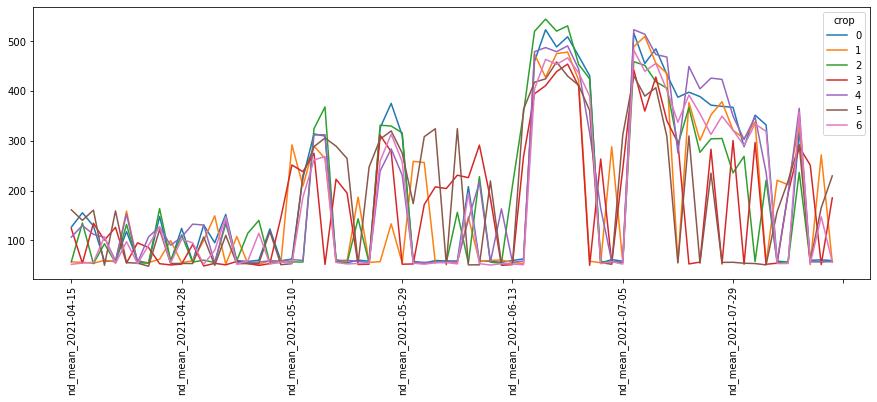

In [6]:
train.groupby('crop')[nd_cols].sum().T.plot(figsize=(15,5));
plt.xticks(rotation=90);

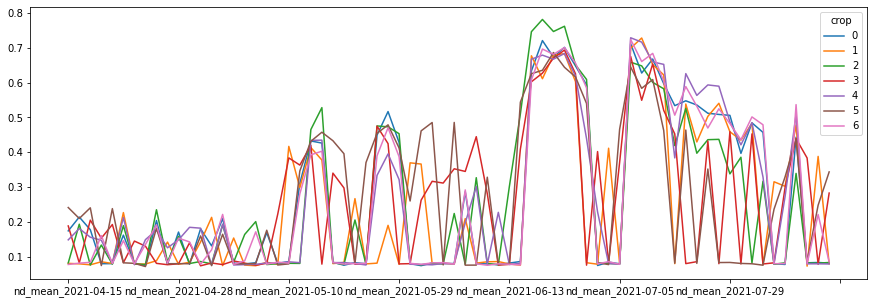

In [7]:
train.groupby('crop')[nd_cols].mean().T.plot(figsize=(15,5));

In [8]:
train.groupby('crop')[nd_cols].mean().T

crop,0,1,2,3,4,5,6
nd_mean_2021-04-15,0.174206,0.080909,0.082165,0.188342,0.148427,0.241243,0.077722
nd_mean_2021-04-16,0.213975,0.079591,0.193379,0.082346,0.180812,0.209796,0.081565
nd_mean_2021-04-18,0.177577,0.076805,0.076078,0.205030,0.156006,0.240497,0.083847
nd_mean_2021-04-19,0.079927,0.085511,0.133585,0.153315,0.147353,0.074595,0.160616
nd_mean_2021-04-20,0.080171,0.080604,0.078612,0.192456,0.082074,0.238109,0.080323
nd_mean_2021-04-22,0.161969,0.226704,0.189230,0.082989,0.212724,0.082563,0.146028
nd_mean_2021-04-23,0.081877,0.079258,0.079370,0.144945,0.077105,0.080967,0.079818
nd_mean_2021-04-25,0.074164,0.079030,0.077386,0.130386,0.149076,0.071827,0.135069
nd_mean_2021-04-26,0.203961,0.088433,0.234924,0.080936,0.176516,0.181801,0.191546
nd_mean_2021-04-27,0.078396,0.142109,0.085306,0.077120,0.125586,0.079924,0.081378


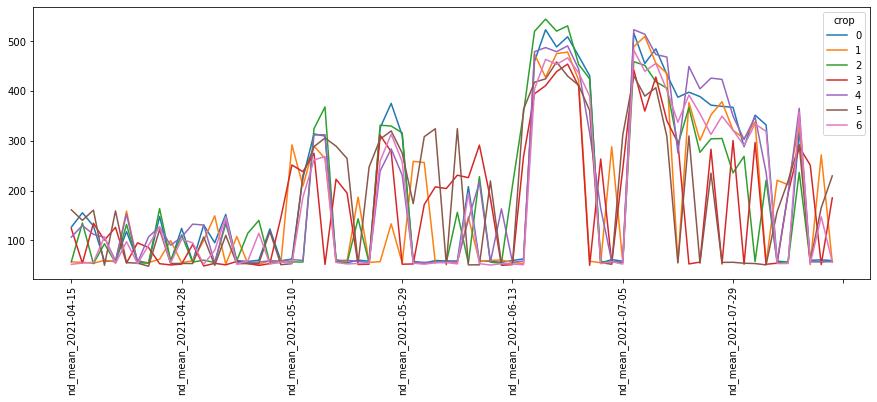

In [9]:
train.groupby('crop')[nd_cols].sum().T.plot(figsize=(15,5));
plt.xticks(rotation=90);

In [10]:
test.head()

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-16,nd_mean_2021-05-17,nd_mean_2021-05-21,nd_mean_2021-05-26,nd_mean_2021-05-27,nd_mean_2021-05-29,nd_mean_2021-06-06,nd_mean_2021-06-09,nd_mean_2021-06-13,nd_mean_2021-06-16,nd_mean_2021-06-18,nd_mean_2021-06-19,nd_mean_2021-06-20,nd_mean_2021-06-22,nd_mean_2021-06-25,nd_mean_2021-06-27,nd_mean_2021-07-07,nd_mean_2021-07-08,nd_mean_2021-07-09,nd_mean_2021-07-13,nd_mean_2021-07-15,nd_mean_2021-07-17,nd_mean_2021-07-20,nd_mean_2021-07-26,nd_mean_2021-07-27,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-07,nd_mean_2021-08-12,.geo,nd_mean_2021-04-15,nd_mean_2021-04-18,nd_mean_2021-04-25,nd_mean_2021-04-27,nd_mean_2021-04-29,nd_mean_2021-04-30,nd_mean_2021-06-07,nd_mean_2021-06-12,nd_mean_2021-06-28,nd_mean_2021-08-01,nd_mean_2021-08-11,nd_mean_2021-05-01,nd_mean_2021-05-03,nd_mean_2021-05-10,nd_mean_2021-05-15,nd_mean_2021-06-02,nd_mean_2021-06-03,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-04-20,nd_mean_2021-04-23,nd_mean_2021-05-09,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop
0,611,26,0.196691,0.000000,0.259303,0.052522,0.133353,0.000000,0.058353,0.273228,0.944027,0.078499,0.128236,0.800393,0.079663,0.140596,0.029266,0.000000,0.021042,0.719716,0.781434,0.787326,0.788925,0.826322,0.779488,0.157232,0.796109,0.807952,0.722456,0.751955,0.263868,0.086229,0.000000,0.743621,0.068059,0.719171,0.000000,0.000000,0.164840,"{""type"":""Polygon"",""coordinates"":[[[35.96545926...",0.083038,0.244827,0.066446,0.153113,0.101380,0.136574,0.000000,0.000000,0.051334,0.593911,0.192016,0.075291,0.269741,0.552214,0.601965,0.057177,0.194608,0.188294,0.000000,0.065030,0.241219,0.064947,0.099994,0.030786,0.159111,0.127732,0.188092,0.000000,0.200005,0.714292,0.084197,0.157733,0.197326,-1
1,6417,98,0.091192,0.000000,0.125823,0.000000,0.027636,0.433244,0.344155,0.461029,0.429587,0.262036,0.170126,0.557339,0.547728,0.586947,-0.000724,0.819140,0.541147,0.113049,0.869505,0.905817,0.871477,0.894545,0.799347,0.851159,0.800004,0.827959,0.752727,0.658426,0.567668,0.494359,0.417848,0.347613,0.476544,0.317670,0.329803,0.007428,0.167479,"{""type"":""Polygon"",""coordinates"":[[[39.50520518...",0.122470,0.241003,0.081871,0.183747,0.000000,0.104354,0.187874,0.108817,0.059370,0.000000,0.106484,0.144733,0.037462,0.000000,0.136006,0.051131,0.004498,0.209801,0.000000,0.000000,0.181600,0.108175,0.248783,0.064743,0.000000,0.039850,0.067910,0.084682,0.025694,0.000000,0.108945,0.141947,0.000000,-1
2,3352,21,0.000000,0.033368,0.285057,0.028275,0.089219,0.080082,0.220537,0.154620,0.612726,0.000000,0.145156,0.652396,0.677490,0.013524,0.025940,0.431207,0.000000,0.217142,0.744129,0.788293,0.034371,0.741114,0.716090,0.051522,0.636270,0.604504,0.672238,0.618853,0.537735,0.000000,0.213445,0.646816,0.030772,0.534127,0.000000,0.000000,0.477381,"{""type"":""Polygon"",""coordinates"":[[[39.30105409...",0.259347,0.297489,0.000000,0.261710,0.327636,0.169726,0.122756,0.038436,0.651745,0.549128,0.469352,0.054238,0.096321,0.043020,0.502996,0.112645,0.240370,0.220739,0.026141,0.000000,0.000000,0.374026,0.037591,0.129930,0.230840,0.034613,0.044020,0.762353,0.167975,0.037838,0.158279,0.073814,0.185710,-1
3,4224,18,0.111243,0.201012,0.000000,0.000000,0.107940,0.000000,0.213204,0.031273,0.434872,0.000000,0.378090,0.132351,0.007538,0.009139,0.000000,0.048160,0.111620,0.070410,0.741992,0.700006,0.717448,0.748885,0.781588,0.006910,0.839688,0.864646,0.792512,0.775334,0.070134,0.638341,0.227013,0.742325,0.736422,0.765292,0.597874,0.035716,0.634286,"{""type"":""Polygon"",""coordinates"":[[[33.08144648...",0.166209,0.000000,0.065305,0.096765,0.000000,0.054840,0.069904,0.001322,0.180683,0.681923,0.614671,0.062221,0.217482,0.400842,0.000000,0.172677,0.0

In [11]:
sample_sub.head()

,id,crop
0,611,0
1,6417,0
2,3352,0
3,4224,0
4,3102,0


In [12]:
train = train[np.sort(train.columns).tolist()]
test = test[np.sort(test.columns).tolist()]

In [13]:
train.head()

,.geo,area,crop,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,nd_mean_2021-04-27,nd_mean_2021-04-28,nd_mean_2021-04-29,nd_mean_2021-04-30,nd_mean_2021-05-01,nd_mean_2021-05-02,nd_mean_2021-05-03,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-08,nd_mean_2021-05-09,nd_mean_2021-05-10,nd_mean_2021-05-15,nd_mean_2021-05-16,nd_mean_2021-05-17,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-05-21,nd_mean_2021-05-24,nd_mean_2021-05-26,nd_mean_2021-05-27,nd_mean_2021-05-29,nd_mean_2021-06-02,nd_mean_2021-06-03,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-06,nd_mean_2021-06-07,nd_mean_2021-06-09,nd_mean_2021-06-10,nd_mean_2021-06-12,nd_mean_2021-06-13,nd_mean_2021-06-16,nd_mean_2021-06-18,nd_mean_2021-06-19,nd_mean_2021-06-20,nd_mean_2021-06-22,nd_mean_2021-06-25,nd_mean_2021-06-27,nd_mean_2021-06-28,nd_mean_2021-07-04,nd_mean_2021-07-05,nd_mean_2021-07-07,nd_mean_2021-07-08,nd_mean_2021-07-09,nd_mean_2021-07-13,nd_mean_2021-07-15,nd_mean_2021-07-17,nd_mean_2021-07-20,nd_mean_2021-07-26,nd_mean_2021-07-27,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",20,3,3536,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,0.000000,0.077577,0.104442,0.000476,0.021096,0.000000,0.000000,0.121799,0.052202,0.083970,0.158723,0.000000,0.008857,0.102757,0.213006,0.358304,0.484102,0.201013,0.425571,0.108999,0.029708,0.081498,0.397833,0.384805,0.015936,0.271128,0.173833,0.118854,0.000000,0.007275,0.111821,0.441994,0.000000,0.038902,0.172777,0.000000,0.412072,0.507029,0.490741,0.549791,0.460996,0.100555,0.155038,0.014060,0.026784,0.706968,0.691171,0.711135,0.731325,0.718093,0.000000,0.147169,0.728053,0.112933,0.727516,0.000000,0.754859,0.000000,0.030883,0.000000,0.658016,0.126832,0.034858,0.614770
1,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",45,4,3739,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,0.024539,0.173578,0.152467,0.196361,0.075484,0.015048,0.242130,0.047408,0.000000,0.000000,0.140326,0.163340,0.113071,0.000000,0.160796,0.031104,0.519456,0.501486,0.248935,0.134469,0.047332,0.046997,0.448796,0.692873,0.628463,0.000000,0.040128,0.208268,0.000000,0.016747,0.708402,0.000000,0.000000,0.150383,0.059826,0.000000,0.492250,0.708562,0.668011,0.675501,0.694017,0.654727,0.432990,0.194295,0.111148,0.709037,0.696734,0.268523,0.076741,0.638567,0.676917,0.460940,0.059759,0.073804,0.666918,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.000000,0.179612
2,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",28,2,1294,0.006391,0.013679,0.000000,0.007055,0.000000,0.120804,0.112471,0.041751,0.037839,0.169020,0.259125,0.011260,0.118255,0.230169,0.000000,0.024845,0.037446,0.506516,0.007437,0.028961,0.151504,0.002801,0.000000,0.561541,0.127633,0.084467,0.000000,0.219614,0.029533,0.245910,0.650065,0.011655,0.000000,0.000000,0.210496,0.000000,0.056252,0.516493,0.130467,0.011727,0.000000,0.717313,0.649345,0.740904,0.652131,0.739836,0.595076,0.741171,0.172335,0.135650,0.155225,0.648106,0.241615,0.586071,0.551204,0.522871,0.543462,0.000000,0.172532,0.119380,0.321827,0.411168,0.000000,0.357296,0.045370,0.172080,0.000000,0.090607,0.000000,0.054127
3,"{""type"":""Polygon"",""coordinates"":[[[44.72154181...",19,5,2859,0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,0.045054,0.072589,0.011531,0.000000,0.042316,0.145339,0.007611,0.046483,0.000000,0.063252,0.000000,0.043604,0.327677,0.052864,0.099087,0.412416,0.510271,0.511552,0.527583,0.000000,0.000000,0.586523,0.524763,0.707093,0.645025,0.441948,0.747106,0.642226,0.132886,0.753284,0.008742,0.000000,0.000000,0.099960,0.032089,0.064643,0.543500,0.706039,0.617195,0.712928,0.628014,0.563310,0.229617,0.056841,0.570928,0.591204,0.557154,0.18

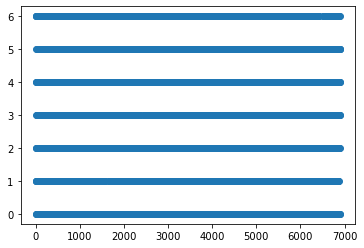

In [14]:
plt.scatter(train['id'], train['crop']);

In [15]:
import json

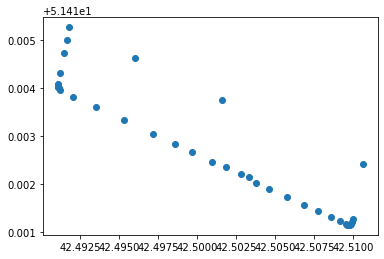

In [16]:
plt.scatter(pd.DataFrame(json.loads(train['.geo'][0])['coordinates'][0])[0],
            pd.DataFrame(json.loads(train['.geo'][0])['coordinates'][0])[1]);


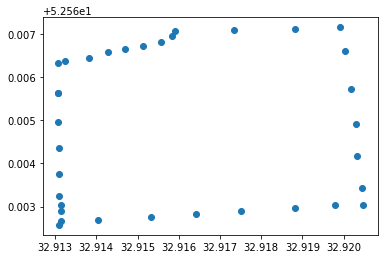

In [17]:
plt.scatter(pd.DataFrame(json.loads(train['.geo'][6])['coordinates'][0])[0],
            pd.DataFrame(json.loads(train['.geo'][6])['coordinates'][0])[1]);

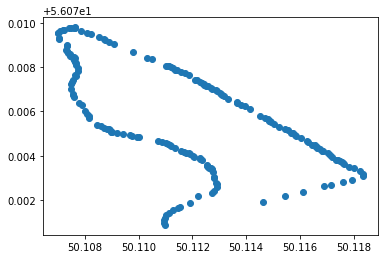

In [18]:
plt.scatter(pd.DataFrame(json.loads(train['.geo'][131])['coordinates'][0])[0],
            pd.DataFrame(json.loads(train['.geo'][131])['coordinates'][0])[1]);

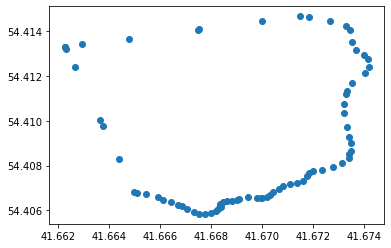

In [19]:
plt.scatter(pd.DataFrame(json.loads(train['.geo'][151])['coordinates'][0])[0],
            pd.DataFrame(json.loads(train['.geo'][151])['coordinates'][0])[1]);

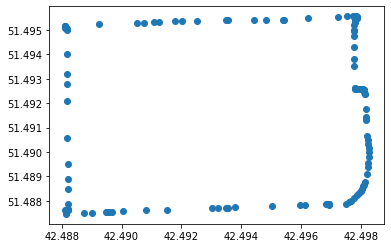

In [20]:
plt.scatter(pd.DataFrame(json.loads(train['.geo'][171])['coordinates'][0])[0],
            pd.DataFrame(json.loads(train['.geo'][171])['coordinates'][0])[1]);

In [21]:
model = lgb.LGBMClassifier(random_state=2)

In [22]:
def find_X1(data):
    #print (data['id'])
    data = json.loads(data['.geo'])   
    tp = data['type']
    #print (tp)
    coords = data[list(data.keys())[1]]
    res = []
    if tp == 'Polygon':
        
        for k in range(len(coords)):
            res.append(np.array(coords[k]).min(axis=0)[0])
        
            
    elif tp == 'MultiPolygon':
  
        for k in range(len(coords)):
            for m in range(len(coords[k])):
                res.append(np.array(coords[k][m]).min(axis=0)[0])
    else:
        

        st = data['geometries']
        for k in range(len(st)):
            tp_2 = st[k]['type']
            #print (st[k])
            #print (tp_2)
            if tp_2 == 'LineString':
                #print (np.array(st[k]['coordinates']).min(axis=0)[0])
                res.append(np.array(st[k]['coordinates']).min(axis=0)[0])
            if tp_2 == 'Polygon':
                for v in range(len(st[k]['coordinates'])):
                    res.append(np.array(st[k]['coordinates'][v]).min(axis=0)[0]) 


    
        #print (res)
    return np.min(res) 

In [23]:
def find_X2(data):
    #print (data['id'])
    data = json.loads(data['.geo'])   
    tp = data['type']
    #print (tp)
    coords = data[list(data.keys())[1]]
    res = []
    if tp == 'Polygon':
        
        for k in range(len(coords)):
            res.append(np.array(coords[k]).max(axis=0)[0])
        
            
    elif tp == 'MultiPolygon':
  
        for k in range(len(coords)):
            for m in range(len(coords[k])):
                res.append(np.array(coords[k][m]).max(axis=0)[0])
    else:
        

        st = data['geometries']
        for k in range(len(st)):
            tp_2 = st[k]['type']
            #print (st[k])
            #print (tp_2)
            if tp_2 == 'LineString':
                #print (np.array(st[k]['coordinates']).max(axis=0)[0])
                res.append(np.array(st[k]['coordinates']).max(axis=0)[0])
            if tp_2 == 'Polygon':
                for v in range(len(st[k]['coordinates'])):
                    res.append(np.array(st[k]['coordinates'][v]).max(axis=0)[0]) 


    
        #print (res)
    return np.max(res) 

In [24]:
def find_Y1(data):
    #print (data['id'])
    data = json.loads(data['.geo'])   
    tp = data['type']
    #print (tp)
    coords = data[list(data.keys())[1]]
    res = []
    if tp == 'Polygon':
        
        for k in range(len(coords)):
            res.append(np.array(coords[k]).min(axis=0)[1])
        
            
    elif tp == 'MultiPolygon':
  
        for k in range(len(coords)):
            for m in range(len(coords[k])):
                res.append(np.array(coords[k][m]).min(axis=0)[1])
    else:
        

        st = data['geometries']
        for k in range(len(st)):
            tp_2 = st[k]['type']
            #print (st[k])
            #print (tp_2)
            if tp_2 == 'LineString':
                #print (np.array(st[k]['coordinates']).min(axis=0)[1])
                res.append(np.array(st[k]['coordinates']).min(axis=0)[1])
            if tp_2 == 'Polygon':
                for v in range(len(st[k]['coordinates'])):
                    res.append(np.array(st[k]['coordinates'][v]).min(axis=0)[1]) 


    
        #print (res)
    return np.min(res) 

In [25]:
train['crop'].unique()

array([3, 4, 2, 5, 6, 1, 0])

In [26]:
def find_Y2(data):
    #print (data['id'])
    data = json.loads(data['.geo'])   
    tp = data['type']
    #print (tp)
    coords = data[list(data.keys())[1]]
    res = []
    if tp == 'Polygon':
        
        for k in range(len(coords)):
            res.append(np.array(coords[k]).max(axis=0)[1])
        
            
    elif tp == 'MultiPolygon':
  
        for k in range(len(coords)):
            for m in range(len(coords[k])):
                res.append(np.array(coords[k][m]).max(axis=0)[1])
    else:
        

        st = data['geometries']
        for k in range(len(st)):
            tp_2 = st[k]['type']
            #print (st[k])
            #print (tp_2)
            if tp_2 == 'LineString':
                #print (np.array(st[k]['coordinates']).min(axis=0)[0])
                res.append(np.array(st[k]['coordinates']).max(axis=0)[1])
            if tp_2 == 'Polygon':
                for v in range(len(st[k]['coordinates'])):
                    res.append(np.array(st[k]['coordinates'][v]).max(axis=0)[1]) 


    
        #print (res)
    return np.max(res) 

In [27]:
full_df = pd.concat([train, test], axis = 0).reset_index(drop=True)

In [28]:
def count_zeros(data):
    res = 0
    for v in data:
        if v ==0:
            res+=1
    return res

In [29]:
#full_df['zero_cnt'] = full_df[nd_cols].apply(count_zeros, axis = 1)

In [30]:
full_df['geo_type'] = full_df.apply(lambda x: json.loads(x['.geo'])['type'], axis = 1)

In [31]:
full_df['X1'] = full_df.apply(find_X1, axis = 1)
full_df['X2'] = full_df.apply(find_X2, axis = 1)
full_df['Y1'] = full_df.apply(find_Y1, axis = 1)
full_df['Y2'] = full_df.apply(find_Y2, axis = 1)

full_df['XC'] = full_df['X1']/2 + full_df['X2']/2
full_df['YC'] = full_df['Y1']/2 + full_df['Y2']/2

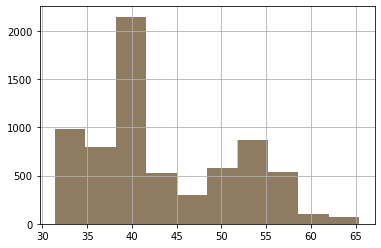

In [32]:
full_df['XC'].hist();
full_df['X1'].hist(alpha = 0.5);

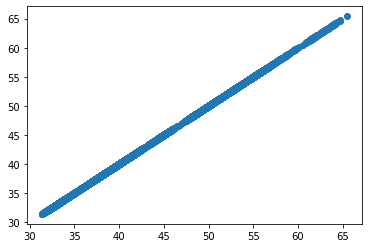

In [33]:
plt.scatter(full_df['XC'], full_df['X1'])

In [34]:
full_df.head()

,.geo,area,crop,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,nd_mean_2021-04-27,nd_mean_2021-04-28,nd_mean_2021-04-29,nd_mean_2021-04-30,nd_mean_2021-05-01,nd_mean_2021-05-02,nd_mean_2021-05-03,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-08,nd_mean_2021-05-09,nd_mean_2021-05-10,nd_mean_2021-05-15,nd_mean_2021-05-16,nd_mean_2021-05-17,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-05-21,nd_mean_2021-05-24,nd_mean_2021-05-26,nd_mean_2021-05-27,nd_mean_2021-05-29,nd_mean_2021-06-02,nd_mean_2021-06-03,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-06,nd_mean_2021-06-07,nd_mean_2021-06-09,nd_mean_2021-06-10,nd_mean_2021-06-12,nd_mean_2021-06-13,nd_mean_2021-06-16,nd_mean_2021-06-18,nd_mean_2021-06-19,nd_mean_2021-06-20,nd_mean_2021-06-22,nd_mean_2021-06-25,nd_mean_2021-06-27,nd_mean_2021-06-28,nd_mean_2021-07-04,nd_mean_2021-07-05,nd_mean_2021-07-07,nd_mean_2021-07-08,nd_mean_2021-07-09,nd_mean_2021-07-13,nd_mean_2021-07-15,nd_mean_2021-07-17,nd_mean_2021-07-20,nd_mean_2021-07-26,nd_mean_2021-07-27,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,geo_type,X1,X2,Y1,Y2,XC,YC
0,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",20,3,3536,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,0.000000,0.077577,0.104442,0.000476,0.021096,0.000000,0.000000,0.121799,0.052202,0.083970,0.158723,0.000000,0.008857,0.102757,0.213006,0.358304,0.484102,0.201013,0.425571,0.108999,0.029708,0.081498,0.397833,0.384805,0.015936,0.271128,0.173833,0.118854,0.000000,0.007275,0.111821,0.441994,0.000000,0.038902,0.172777,0.000000,0.412072,0.507029,0.490741,0.549791,0.460996,0.100555,0.155038,0.014060,0.026784,0.706968,0.691171,0.711135,0.731325,0.718093,0.000000,0.147169,0.728053,0.112933,0.727516,0.000000,0.754859,0.000000,0.030883,0.000000,0.658016,0.126832,0.034858,0.614770,Polygon,42.491073,42.510586,51.411154,51.415276,42.500829,51.413215
1,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",45,4,3739,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,0.024539,0.173578,0.152467,0.196361,0.075484,0.015048,0.242130,0.047408,0.000000,0.000000,0.140326,0.163340,0.113071,0.000000,0.160796,0.031104,0.519456,0.501486,0.248935,0.134469,0.047332,0.046997,0.448796,0.692873,0.628463,0.000000,0.040128,0.208268,0.000000,0.016747,0.708402,0.000000,0.000000,0.150383,0.059826,0.000000,0.492250,0.708562,0.668011,0.675501,0.694017,0.654727,0.432990,0.194295,0.111148,0.709037,0.696734,0.268523,0.076741,0.638567,0.676917,0.460940,0.059759,0.073804,0.666918,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.000000,0.179612,Polygon,50.255451,50.274955,56.601681,56.610615,50.265203,56.606148
2,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",28,2,1294,0.006391,0.013679,0.000000,0.007055,0.000000,0.120804,0.112471,0.041751,0.037839,0.169020,0.259125,0.011260,0.118255,0.230169,0.000000,0.024845,0.037446,0.506516,0.007437,0.028961,0.151504,0.002801,0.000000,0.561541,0.127633,0.084467,0.000000,0.219614,0.029533,0.245910,0.650065,0.011655,0.000000,0.000000,0.210496,0.000000,0.056252,0.516493,0.130467,0.011727,0.000000,0.717313,0.649345,0.740904,0.652131,0.739836,0.595076,0.741171,0.172335,0.135650,0.155225,0.648106,0.241615,0.586071,0.551204,0.522871,0.543462,0.000000,0.172532,0.119380,0.321827,0.411168,0.000000,0.357296,0.045370,0.172080,0.000000,0.090607,0.000000,0.054127,Polygon,37.996990,38.007995,53.833333,53.839480,38.002492,53.836407
3,"{""type"":""Polygon"",""coordinates"":[[[44.72154181...",19,5,2859,0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,0.045054,0.072589,0.011531,0.000000,0.042316,0.145339,0.007611,0.046483,0.000000,0.063252,0.000000,0.043604,0.327677,0.052864,0.099087,0.412416,0.510271,0.511552,0.527583,0.000000,0.000000,0.58652

In [35]:
#for c in nd_cols:
#    full_df[c + '_is_zero'] = full_df[c].apply(lambda x: 1 if x == 0 else 0)

In [36]:
full_df.mean().T

area                    53.975366
crop                     1.767280
id                    3450.000000
nd_mean_2021-04-15       0.140703
nd_mean_2021-04-16       0.149410
nd_mean_2021-04-18       0.144799
nd_mean_2021-04-19       0.118251
nd_mean_2021-04-20       0.118503
nd_mean_2021-04-22       0.159222
nd_mean_2021-04-23       0.089174
nd_mean_2021-04-25       0.102280
nd_mean_2021-04-26       0.166071
nd_mean_2021-04-27       0.095241
nd_mean_2021-04-28       0.124921
nd_mean_2021-04-29       0.112490
nd_mean_2021-04-30       0.129481
nd_mean_2021-05-01       0.111719
nd_mean_2021-05-02       0.163151
nd_mean_2021-05-03       0.090550
nd_mean_2021-05-04       0.093091
nd_mean_2021-05-07       0.110066
nd_mean_2021-05-08       0.107144
nd_mean_2021-05-09       0.100717
nd_mean_2021-05-10       0.173439
nd_mean_2021-05-15       0.251207
nd_mean_2021-05-16       0.427340
nd_mean_2021-05-17       0.386168
nd_mean_2021-05-19       0.168447
nd_mean_2021-05-20       0.155179
nd_mean_2021-0

In [37]:
full_df['XC_round_0']=np.round(full_df['XC'],0)
full_df['XC_round_1']=np.round(full_df['XC'],1)
full_df['XC_round_2']=np.round(full_df['XC'],2)

full_df['YC_round_0']=np.round(full_df['YC'],0)
full_df['YC_round_1']=np.round(full_df['YC'],1)
full_df['YC_round_2']=np.round(full_df['YC'],2)

full_df['XC_YC_round_0'] = full_df.apply(lambda x: str(x['XC_round_0']) + '_' + str(x['YC_round_0']), axis = 1).astype('category')
full_df['XC_YC_round_1'] = full_df.apply(lambda x: str(x['XC_round_1']) + '_' + str(x['YC_round_1']), axis = 1).astype('category')
full_df['XC_YC_round_2'] = full_df.apply(lambda x: str(x['XC_round_2']) + '_' + str(x['YC_round_2']), axis = 1).astype('category')

In [38]:
full_df['XC_YC_round_2'].value_counts().head(30)

34.16_53.31    4
49.98_55.09    4
32.19_52.45    4
32.11_52.6     3
34.61_52.49    3
32.81_52.94    3
34.69_52.97    3
32.05_52.5     3
33.83_53.18    3
33.04_52.47    3
32.04_52.5     3
42.5_51.41     3
33.25_52.95    3
33.03_52.52    3
37.15_53.91    3
39.6_51.32     3
33.19_52.56    2
37.49_52.4     2
33.18_52.57    2
48.46_55.01    2
38.99_51.86    2
33.0_52.53     2
52.55_55.31    2
52.66_54.66    2
52.64_55.09    2
38.95_52.86    2
52.84_54.48    2
48.59_55.62    2
52.54_55.43    2
56.24_53.92    2
Name: XC_YC_round_2, dtype: int64

In [39]:
R = 6373.0 # радиус земли в километрах

def distance(x,y):
    """
    Параметры
    ----------
    x : tuple, широта и долгота первой геокоординаты 
    y : tuple, широта и долгота второй геокоординаты 
    
    Результат
    ----------
    result : дистанция в километрах между двумя геокоординатами
    """
    lat_a, long_a, lat_b, long_b = map(radians, [*x,*y])    
    dlon = long_b - long_a
    dlat = lat_b - lat_a
    a = sin(dlat/2)**2 + cos(lat_a) * cos(lat_b) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [40]:
knc = KNeighborsClassifier(metric=distance,n_neighbors=11)
nn = NearestNeighbors(metric=distance)

In [41]:
dots = full_df[['YC','XC']]

In [42]:
knc.fit(X=dots , y=np.ones(dots.shape[0]))

KNeighborsClassifier(metric=<function distance at 0x7f8d091b0dc0>,
                     n_neighbors=11)

In [43]:
distances, indexes = knc.kneighbors(X=dots,n_neighbors=11)

In [44]:

for i in range(1,11):
    full_df['distance_%s'%i] = distances[:,i]
    full_df['id_%s'%i]=indexes[:,i]
    full_df['id_%s'%i] = full_df['id_%s'%i].apply(lambda x: full_df['id'].values[x])


In [45]:
full_df['id'].nunique(), full_df.shape

(6901, (6901, 110))

In [46]:
full_df[full_df['id']==4515]

,.geo,area,crop,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,nd_mean_2021-04-27,nd_mean_2021-04-28,nd_mean_2021-04-29,nd_mean_2021-04-30,nd_mean_2021-05-01,nd_mean_2021-05-02,nd_mean_2021-05-03,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-08,nd_mean_2021-05-09,nd_mean_2021-05-10,nd_mean_2021-05-15,nd_mean_2021-05-16,nd_mean_2021-05-17,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-05-21,nd_mean_2021-05-24,nd_mean_2021-05-26,nd_mean_2021-05-27,nd_mean_2021-05-29,nd_mean_2021-06-02,nd_mean_2021-06-03,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-06,nd_mean_2021-06-07,nd_mean_2021-06-09,nd_mean_2021-06-10,nd_mean_2021-06-12,nd_mean_2021-06-13,nd_mean_2021-06-16,nd_mean_2021-06-18,nd_mean_2021-06-19,nd_mean_2021-06-20,nd_mean_2021-06-22,nd_mean_2021-06-25,nd_mean_2021-06-27,nd_mean_2021-06-28,nd_mean_2021-07-04,nd_mean_2021-07-05,nd_mean_2021-07-07,nd_mean_2021-07-08,nd_mean_2021-07-09,nd_mean_2021-07-13,nd_mean_2021-07-15,nd_mean_2021-07-17,nd_mean_2021-07-20,nd_mean_2021-07-26,nd_mean_2021-07-27,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,geo_type,X1,X2,Y1,Y2,XC,YC,XC_round_0,XC_round_1,XC_round_2,YC_round_0,YC_round_1,YC_round_2,XC_YC_round_0,XC_YC_round_1,XC_YC_round_2,distance_1,id_1,distance_2,id_2,distance_3,id_3,distance_4,id_4,distance_5,id_5,distance_6,id_6,distance_7,id_7,distance_8,id_8,distance_9,id_9,distance_10,id_10
1258,"{""type"":""Polygon"",""coordinates"":[[[32.04730957...",23,1,4515,0.0,0.068979,0.11149,0.0,0.22561,0.143086,0.117788,0.057399,0.085539,0.158866,0.0,0.078823,0.218617,0.386874,0.069235,0.0,0.071812,0.02741,0.0,0.029543,0.283469,0.098957,0.0,0.057737,0.0,0.184519,0.0,0.202695,0.082738,0.035022,0.119012,0.019693,0.055974,0.015704,0.131762,0.005397,0.158235,0.062402,0.075238,0.035614,0.190939,0.068764,0.677633,0.627945,0.01551,0.719024,0.791233,0.142217,0.034826,0.117824,0.001245,0.832792,0.832706,0.797561,0.682376,0.169424,0.24827,0.049699,0.015237,0.540132,0.0,0.515553,0.472464,0.117337,0.420822,0.11763,0.362972,0.066476,0.197787,0.122875,Polygon,32.044474,32.055274,52.497113,52.502268,32.049874,52.49969,32.0,32.0,32.05,52.0,52.5,52.5,32.0_52.0,32.0_52.5,32.05_52.5,0.349957,2472,0.449712,6863,0.646193,4780,0.734811,3820,0.87982,2697,1.01019,4790,1.010808,2804,1.030229,1281,1.271626,4680,1.321117,1047


In [47]:
full_df.sort_values(by='distance_10')

,.geo,area,crop,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,nd_mean_2021-04-27,nd_mean_2021-04-28,nd_mean_2021-04-29,nd_mean_2021-04-30,nd_mean_2021-05-01,nd_mean_2021-05-02,nd_mean_2021-05-03,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-08,nd_mean_2021-05-09,nd_mean_2021-05-10,nd_mean_2021-05-15,nd_mean_2021-05-16,nd_mean_2021-05-17,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-05-21,nd_mean_2021-05-24,nd_mean_2021-05-26,nd_mean_2021-05-27,nd_mean_2021-05-29,nd_mean_2021-06-02,nd_mean_2021-06-03,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-06,nd_mean_2021-06-07,nd_mean_2021-06-09,nd_mean_2021-06-10,nd_mean_2021-06-12,nd_mean_2021-06-13,nd_mean_2021-06-16,nd_mean_2021-06-18,nd_mean_2021-06-19,nd_mean_2021-06-20,nd_mean_2021-06-22,nd_mean_2021-06-25,nd_mean_2021-06-27,nd_mean_2021-06-28,nd_mean_2021-07-04,nd_mean_2021-07-05,nd_mean_2021-07-07,nd_mean_2021-07-08,nd_mean_2021-07-09,nd_mean_2021-07-13,nd_mean_2021-07-15,nd_mean_2021-07-17,nd_mean_2021-07-20,nd_mean_2021-07-26,nd_mean_2021-07-27,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,geo_type,X1,X2,Y1,Y2,XC,YC,XC_round_0,XC_round_1,XC_round_2,YC_round_0,YC_round_1,YC_round_2,XC_YC_round_0,XC_YC_round_1,XC_YC_round_2,distance_1,id_1,distance_2,id_2,distance_3,id_3,distance_4,id_4,distance_5,id_5,distance_6,id_6,distance_7,id_7,distance_8,id_8,distance_9,id_9,distance_10,id_10
3816,"{""type"":""Polygon"",""coordinates"":[[[32.04869191...",19,1,2472,0.024064,0.040908,0.070035,0.034255,0.135333,0.142088,0.135964,0.107074,0.229018,0.111711,0.000000,0.000000,0.221506,0.397285,0.033449,0.009896,0.000000,0.021205,0.226734,0.191620,0.283838,0.097316,0.186701,0.012647,0.000000,0.141359,0.284704,0.132269,0.134664,0.108311,0.135299,0.223263,0.001060,0.075958,0.167090,0.147097,0.026005,0.206934,0.162537,0.000000,0.158654,0.086215,0.780440,0.669613,0.228400,0.652266,0.791111,0.012276,0.000000,0.048251,0.000000,0.796564,0.788012,0.764931,0.603725,0.122471,0.156360,0.530459,0.000000,0.550268,0.014027,0.591013,0.527815,0.206934,0.483887,0.193709,0.427839,0.000000,0.258205,0.174919,Polygon,32.047310,32.056972,52.494376,52.499350,32.052141,52.496863,32.0,32.1,32.05,52.0,52.5,52.50,32.0_52.0,32.1_52.5,32.05_52.5,0.349957,4515,0.639188,4780,0.670175,4790,0.799669,6863,0.828299,2804,0.928712,3820,1.074289,2697,1.194758,1047,1.230664,4680,1.278855,1281
1258,"{""type"":""Polygon"",""coordinates"":[[[32.04730957...",23,1,4515,0.000000,0.068979,0.111490,0.000000,0.225610,0.143086,0.117788,0.057399,0.085539,0.158866,0.000000,0.078823,0.218617,0.386874,0.069235,0.000000,0.071812,0.027410,0.000000,0.029543,0.283469,0.098957,0.000000,0.057737,0.000000,0.184519,0.000000,0.202695,0.082738,0.035022,0.119012,0.019693,0.055974,0.015704,0.131762,0.005397,0.158235,0.062402,0.075238,0.035614,0.190939,0.068764,0.677633,0.627945,0.015510,0.719024,0.791233,0.142217,0.034826,0.117824,0.001245,0.832792,0.832706,0.797561,0.682376,0.169424,0.248270,0.049699,0.015237,0.540132,0.000000,0.515553,0.472464,0.117337,0.420822,0.117630,0.362972,0.066476,0.197787,0.122875,Polygon,32.044474,32.055274,52.497113,52.502268,32.049874,52.499690,32.0,32.0,32.05,52.0,52.5,52.50,32.0_52.0,32.0_52.5,32.05_52.5,0.349957,2472,0.449712,6863,0.646193,4780,0.734811,3820,0.879820,2697,1.010190,4790,1.010808,2804,1.030229,1281,1.271626,4680,1.321117,1047
79,"{""type"":""Polygon"",""coordinates"":[[[32.04182489...",32,1,6863,0.247051,0.001500,0.048694,0.122014,0.088001,0.503439,0.183919,0.002139,0.086344,0.158866,0.271213,0.064702,0.278511,0.481832,0.055572,0.073675,0.040357,0.000000,0.068166,0.235040,0.464642,0.001182,0.192322,0.215601,0.073027,0.123283,0.214836,0.138879,0.006177,0.251095,0.048479,0.104026,0.467372,0.077856,0.151472,0.115379,0.000000,0.

In [48]:
dots.head()

,YC,XC
0,51.413215,42.500829
1,56.606148,50.265203
2,53.836407,38.002492
3,55.935254,44.727274
4,52.907465,34.784395


In [49]:
#for v in range(1,11):
#    full_df['max_v_' + str(v)] = np.sort(full_df[nd_cols].values, axis = 1)[:,-v]
#    full_df['max_v_pos_' + str(v)] = np.argsort(full_df[nd_cols].values, axis = 1)[:,-v]

In [50]:
train_df = full_df[full_df['crop']!=-1]

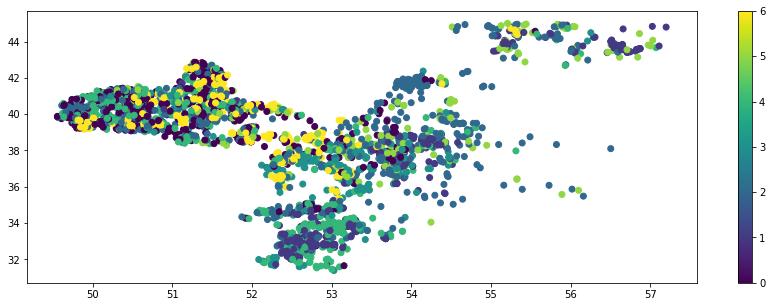

In [51]:
plt.figure(figsize=(15,5));
plt.scatter(train_df[train_df['X1']<45]['Y1'], train_df[train_df['X1']<45]['X1'],
            c = train_df[train_df['X1']<45]['crop']);
plt.colorbar();

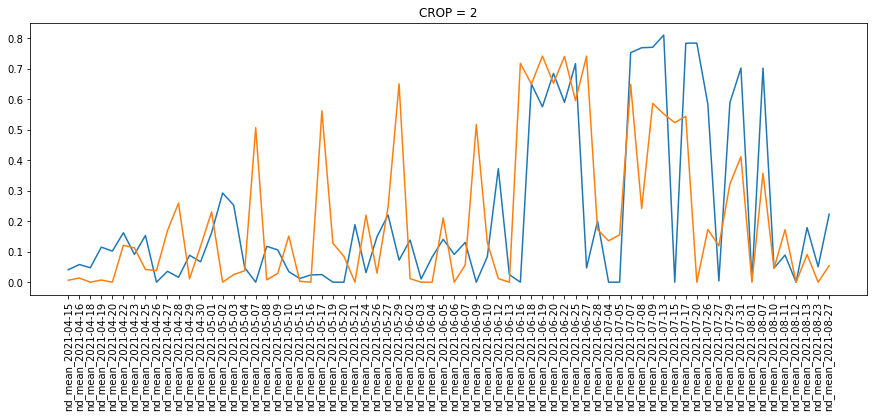

In [52]:
ID = 2296

plt.figure(figsize=(15,5));
plt.plot(train_df[train_df['id']==ID][nd_cols].T);
ID = 1294
plt.plot(train_df[train_df['id']==ID][nd_cols].T);
plt.xticks(rotation=90);
plt.title('CROP = ' + str(train_df[train_df['id']==ID]['crop'].values[0]));



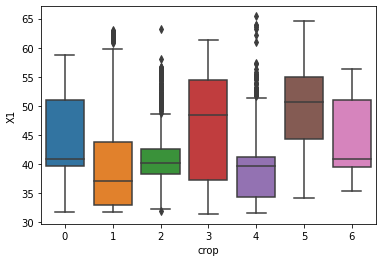

In [53]:
sns.boxplot(x = train_df['crop'], y = train_df['X1']);

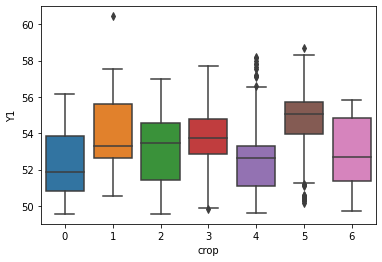

In [54]:
sns.boxplot(x = train_df['crop'], y = train_df['Y1']);

In [55]:
#sns.boxplot(x = train_df['crop'], y = train_df['zero_cnt']);

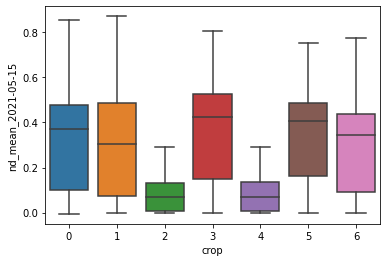

In [56]:
sns.boxplot(x = train_df['crop'], y = train_df['nd_mean_2021-05-15']);

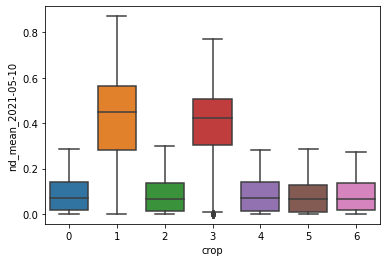

In [57]:
sns.boxplot(x = train_df['crop'], y = train_df['nd_mean_2021-05-10']);

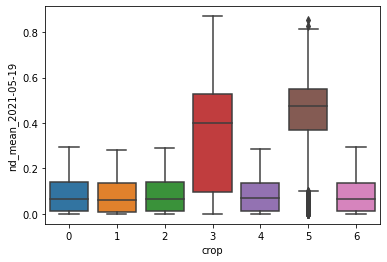

In [58]:
sns.boxplot(x = train_df['crop'], y = train_df['nd_mean_2021-05-19']);

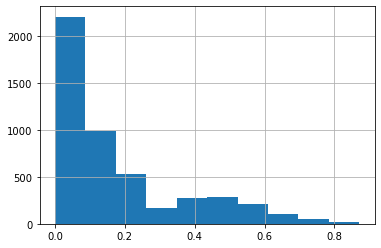

In [59]:
train_df['nd_mean_2021-05-10'].hist();

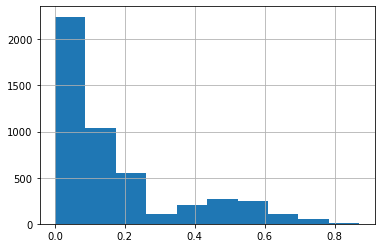

In [60]:
train_df['nd_mean_2021-05-19'].hist();

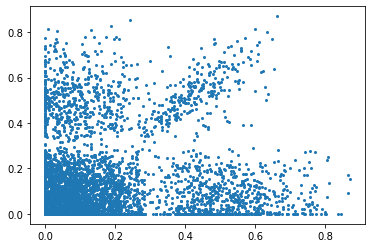

In [61]:
plt.scatter(train_df['nd_mean_2021-05-10'], train_df['nd_mean_2021-05-19'], s = 4);

In [62]:
for v in nd_cols:
    fdf_v = full_df[full_df[v]>0].groupby(['XC_YC_round_0'])[v].mean().reset_index().rename(columns = {v: v + '_nn'})
    full_df = full_df.merge(fdf_v, how = 'left', on = 'XC_YC_round_0')
    full_df[v + '_nn'].fillna(0, inplace = True)
    fdf_v = full_df[full_df[v]>0].groupby(['XC_YC_round_1'])[v].mean().reset_index().rename(columns = {v: v + '_nn_2'})
    full_df = full_df.merge(fdf_v, how = 'left', on = 'XC_YC_round_1')
    full_df[v + '_nn_2'].fillna(0, inplace = True)

In [63]:
train_prep = full_df[full_df['crop']!=-1].reset_index(drop=True)
test_prep = full_df[full_df['crop']==-1].reset_index(drop=True)

In [64]:
drop_cols = ["id",".geo", "crop", "geo_type"]

In [65]:
def train_lightgbm(X_train, y_train, X_val, y_val, 
                   params, num_boost_round, early_stopping_rounds, verbose_eval):
    d_train = lgb.Dataset(X_train, y_train)
    d_val = lgb.Dataset(X_val, y_val)
    model = lgb.train(
        params=params,
        train_set=d_train,
        num_boost_round=num_boost_round,
        valid_sets=d_val,
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=verbose_eval,
        feval=recall,
        categorical_feature=['XC_YC_round_0', 'XC_YC_round_1', 'XC_YC_round_2']
    )
    return model

In [66]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'random_state': 20,
    'learning_rate': 0.01,
    'metric': 'custom',
    'num_classes': 7, 
    'subsample': 0.9,
    'colsample_by_tree': 0.9,
    'subsample_freq': 1,
    'n_jobs': -1,
    'reg_lambda': 0}

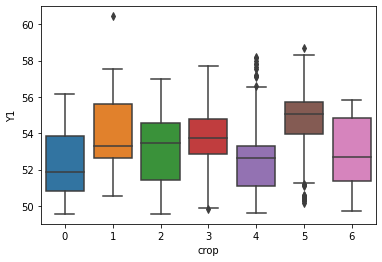

In [67]:
sns.boxplot(x=train_prep['crop'], y = train_prep['Y1']);

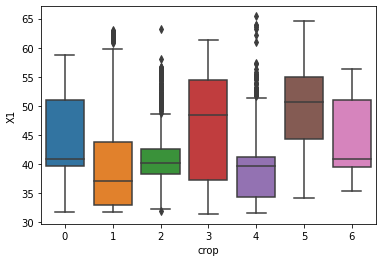

In [68]:
sns.boxplot(x=train_prep['crop'], y = train_prep['X1']);

In [69]:
kf = KFold(n_splits=10, random_state=7, shuffle=True)

In [70]:
train_prep.isnull().sum()

.geo                       0
area                       0
crop                       0
id                         0
nd_mean_2021-04-15         0
nd_mean_2021-04-16         0
nd_mean_2021-04-18         0
nd_mean_2021-04-19         0
nd_mean_2021-04-20         0
nd_mean_2021-04-22         0
nd_mean_2021-04-23         0
nd_mean_2021-04-25         0
nd_mean_2021-04-26         0
nd_mean_2021-04-27         0
nd_mean_2021-04-28         0
nd_mean_2021-04-29         0
nd_mean_2021-04-30         0
nd_mean_2021-05-01         0
nd_mean_2021-05-02         0
nd_mean_2021-05-03         0
nd_mean_2021-05-04         0
nd_mean_2021-05-07         0
nd_mean_2021-05-08         0
nd_mean_2021-05-09         0
nd_mean_2021-05-10         0
nd_mean_2021-05-15         0
nd_mean_2021-05-16         0
nd_mean_2021-05-17         0
nd_mean_2021-05-19         0
nd_mean_2021-05-20         0
nd_mean_2021-05-21         0
nd_mean_2021-05-24         0
nd_mean_2021-05-26         0
nd_mean_2021-05-27         0
nd_mean_2021-0

Training until validation scores don't improve for 1000 rounds
[500]	valid_0's RECALL: 0.975491
[1000]	valid_0's RECALL: 0.979239
[1500]	valid_0's RECALL: 0.98162
Early stopping, best iteration is:
[704]	valid_0's RECALL: 0.98162


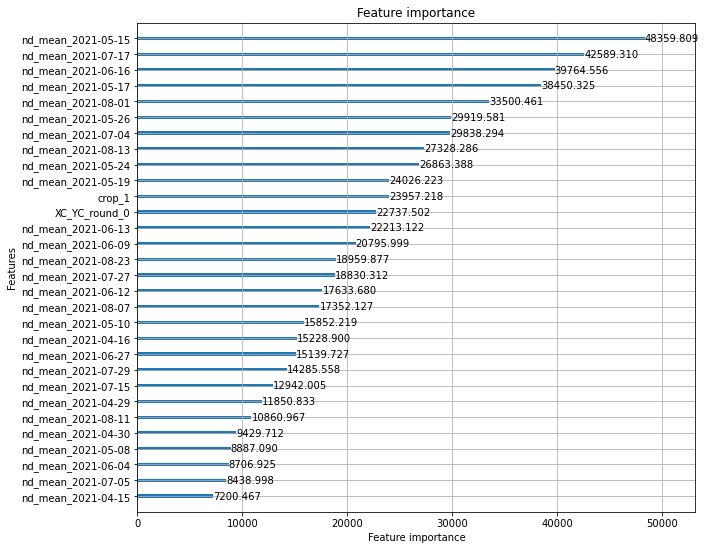

Training until validation scores don't improve for 1000 rounds
[500]	valid_0's RECALL: 0.967955
[1000]	valid_0's RECALL: 0.967955
[1500]	valid_0's RECALL: 0.965995
[2000]	valid_0's RECALL: 0.968127
Early stopping, best iteration is:
[1217]	valid_0's RECALL: 0.970259


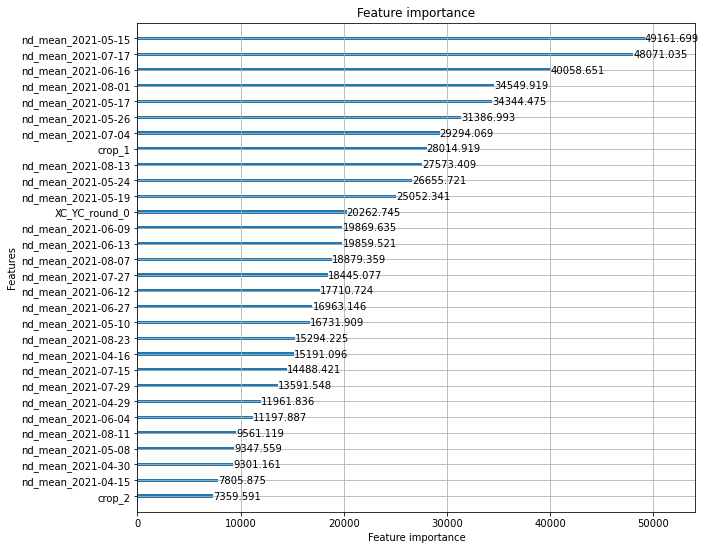

Training until validation scores don't improve for 1000 rounds
[500]	valid_0's RECALL: 0.968556
[1000]	valid_0's RECALL: 0.971202
[1500]	valid_0's RECALL: 0.970932
[2000]	valid_0's RECALL: 0.970932
Early stopping, best iteration is:
[1199]	valid_0's RECALL: 0.974842


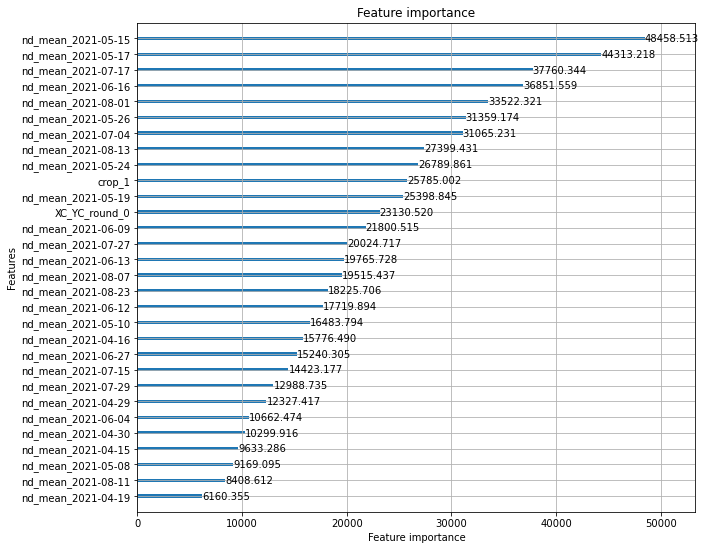

Training until validation scores don't improve for 1000 rounds
[500]	valid_0's RECALL: 0.974747
[1000]	valid_0's RECALL: 0.980762
[1500]	valid_0's RECALL: 0.983225
[2000]	valid_0's RECALL: 0.983225
[2500]	valid_0's RECALL: 0.985011
[3000]	valid_0's RECALL: 0.985011
Early stopping, best iteration is:
[2089]	valid_0's RECALL: 0.985011


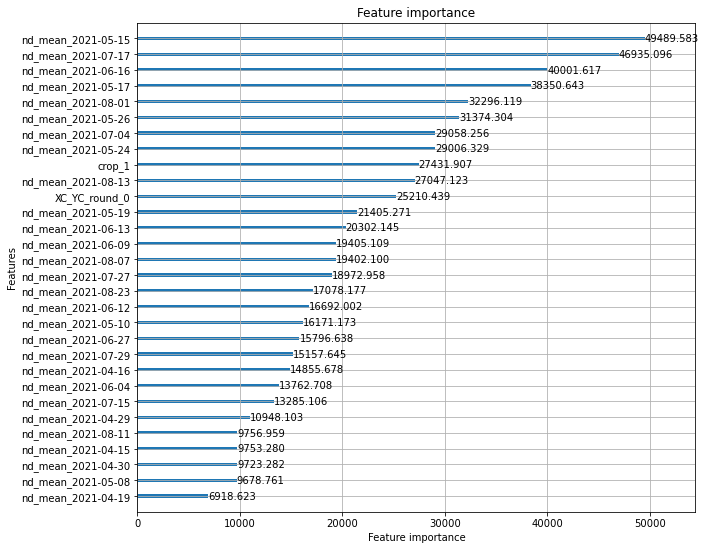

Training until validation scores don't improve for 1000 rounds
[500]	valid_0's RECALL: 0.982284
[1000]	valid_0's RECALL: 0.982445
[1500]	valid_0's RECALL: 0.982445
Early stopping, best iteration is:
[902]	valid_0's RECALL: 0.982445


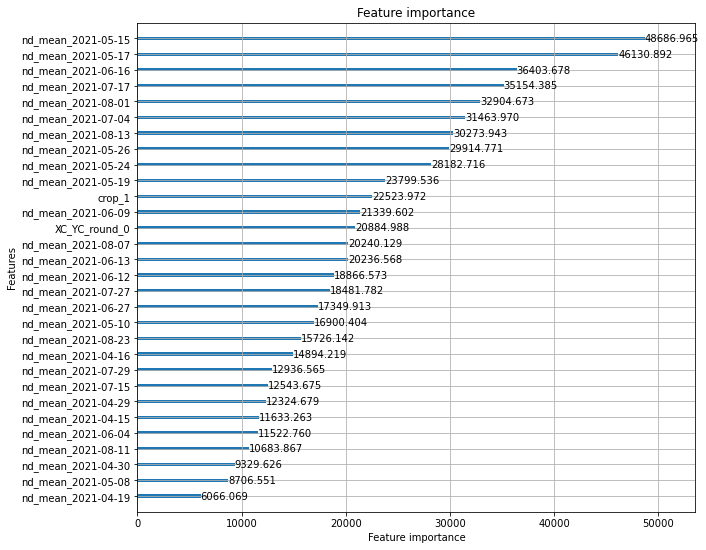

Training until validation scores don't improve for 1000 rounds
[500]	valid_0's RECALL: 0.971845
[1000]	valid_0's RECALL: 0.977805
[1500]	valid_0's RECALL: 0.9762
Early stopping, best iteration is:
[787]	valid_0's RECALL: 0.977805


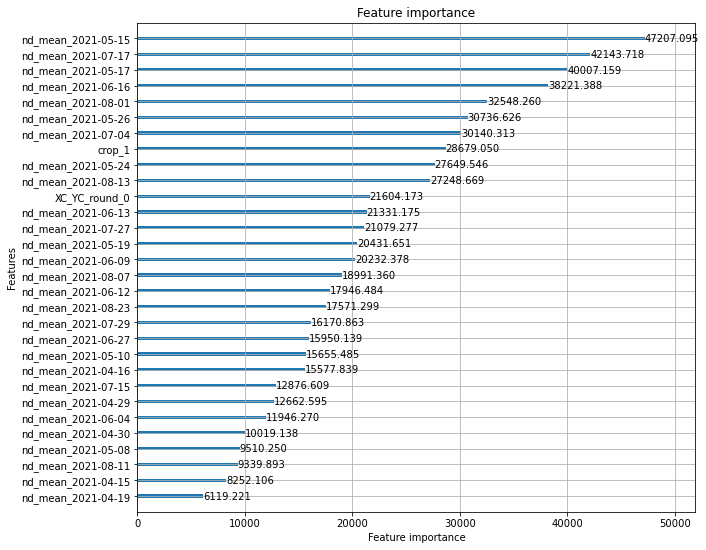

Training until validation scores don't improve for 1000 rounds
[500]	valid_0's RECALL: 0.979263
[1000]	valid_0's RECALL: 0.981118
[1500]	valid_0's RECALL: 0.981118
Early stopping, best iteration is:
[696]	valid_0's RECALL: 0.981118


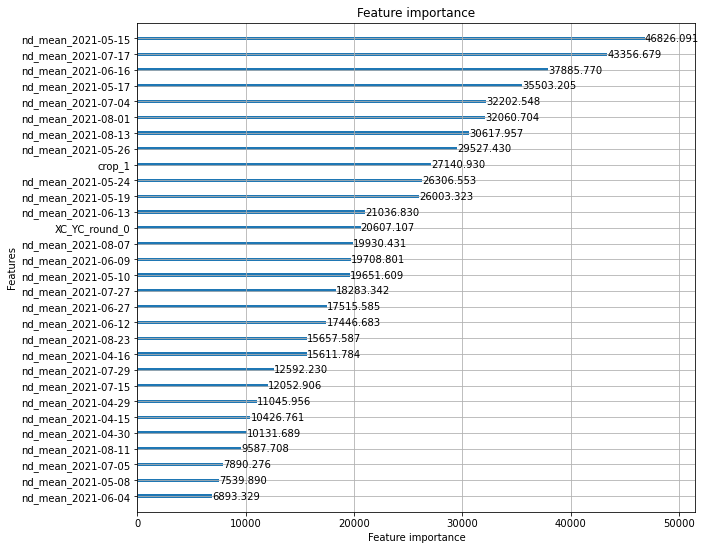

Training until validation scores don't improve for 1000 rounds
[500]	valid_0's RECALL: 0.969238
[1000]	valid_0's RECALL: 0.973576
[1500]	valid_0's RECALL: 0.971767
[2000]	valid_0's RECALL: 0.975709
[2500]	valid_0's RECALL: 0.975709
Early stopping, best iteration is:
[1754]	valid_0's RECALL: 0.975709


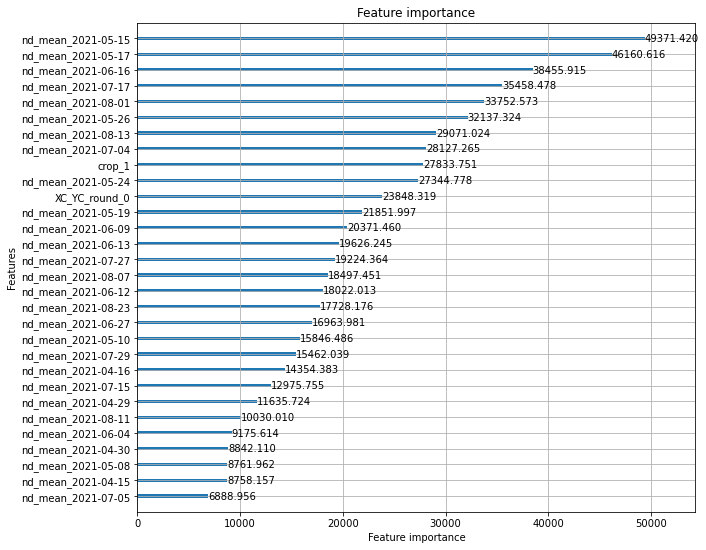

Training until validation scores don't improve for 1000 rounds
[500]	valid_0's RECALL: 0.979831
[1000]	valid_0's RECALL: 0.980114
[1500]	valid_0's RECALL: 0.975967
Early stopping, best iteration is:
[775]	valid_0's RECALL: 0.982098


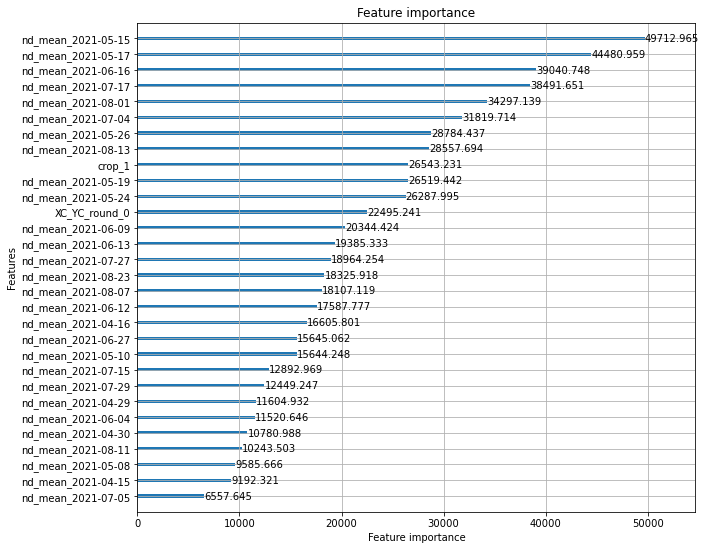

Training until validation scores don't improve for 1000 rounds
[500]	valid_0's RECALL: 0.966289
[1000]	valid_0's RECALL: 0.975855
[1500]	valid_0's RECALL: 0.975855
[2000]	valid_0's RECALL: 0.977896
[2500]	valid_0's RECALL: 0.975795
Early stopping, best iteration is:
[1785]	valid_0's RECALL: 0.979997


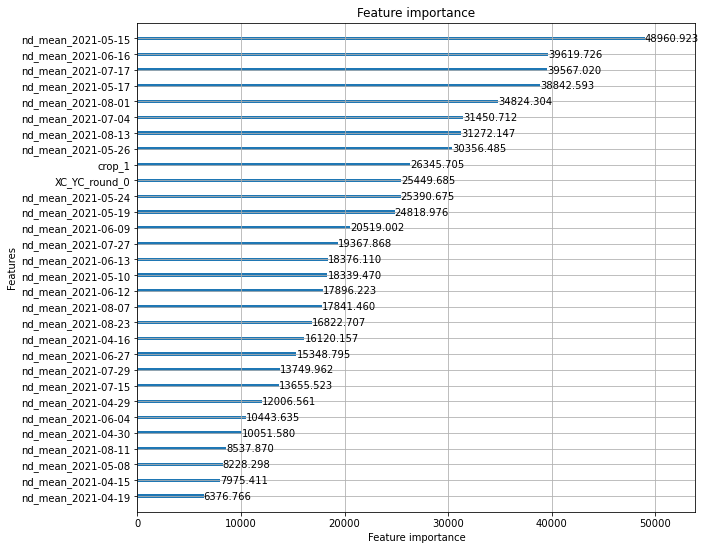

In [74]:
ans_df = pd.DataFrame()
ans_df_test = pd.DataFrame()

for train_idx, test_idx in kf.split(train_prep):
    X_train = train_prep.iloc[train_idx, :]
    y_train = X_train['crop']
    X_test = train_prep.iloc[test_idx, :]
    y_test = X_test['crop']
    test_prep_k = test_prep.copy()
    for i in range(1,11):
        X_train = X_train.merge(X_train[['id', 'crop']].rename(columns = {'id': 'id_' + str(i), 'crop': 'crop_' + str(i)}), how = 'left', on = 'id_' + str(i))
        X_train['crop_' + str(i)] = X_train['crop_' + str(i)].fillna(-1)
        X_test = X_test.merge(X_train[['id', 'crop']].rename(columns = {'id': 'id_' + str(i), 'crop': 'crop_' + str(i)}), how = 'left', on = 'id_' + str(i))
        X_test['crop_' + str(i)] = X_test['crop_' + str(i)].fillna(-1)
        test_prep_k = test_prep_k.merge(X_train[['id', 'crop']].rename(columns = {'id': 'id_' + str(i), 'crop': 'crop_' + str(i)}), how = 'left', on = 'id_' + str(i))
        test_prep_k['crop_' + str(i)] = test_prep_k['crop_' + str(i)].fillna(-1)
    model = train_lightgbm(X_train.drop(drop_cols, axis = 1), y_train,
                           X_test.drop(drop_cols, axis = 1), y_test, params, 5000, 1000, 500)
    ans_df_k = X_test.copy()
    ans_df_k_test = test_prep.copy()
    y_pred = model.predict(X_test.drop(drop_cols, axis = 1))
    
    
    y_pred_test = model.predict(test_prep_k.drop(drop_cols, axis =1))
    for k in range(7):
        ans_df_k['crop_pred_' + str(k)] = y_pred[:,k]
        ans_df_k_test['crop_pred_' + str(k)] = y_pred_test[:,k]
    ans_df = pd.concat([ans_df, ans_df_k], axis = 0)
    ans_df_test = pd.concat([ans_df_test, ans_df_k_test], axis = 0)
    lgb.plot_importance(model, importance_type='gain', max_num_features=30, figsize = (10,9));
    plt.show();

In [75]:
X_train.head()

,.geo,area,crop,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,nd_mean_2021-04-27,nd_mean_2021-04-28,nd_mean_2021-04-29,nd_mean_2021-04-30,nd_mean_2021-05-01,nd_mean_2021-05-02,nd_mean_2021-05-03,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-08,nd_mean_2021-05-09,nd_mean_2021-05-10,nd_mean_2021-05-15,nd_mean_2021-05-16,nd_mean_2021-05-17,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-05-21,nd_mean_2021-05-24,nd_mean_2021-05-26,nd_mean_2021-05-27,nd_mean_2021-05-29,nd_mean_2021-06-02,nd_mean_2021-06-03,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-06,nd_mean_2021-06-07,nd_mean_2021-06-09,nd_mean_2021-06-10,nd_mean_2021-06-12,nd_mean_2021-06-13,nd_mean_2021-06-16,nd_mean_2021-06-18,nd_mean_2021-06-19,nd_mean_2021-06-20,nd_mean_2021-06-22,nd_mean_2021-06-25,nd_mean_2021-06-27,nd_mean_2021-06-28,nd_mean_2021-07-04,nd_mean_2021-07-05,nd_mean_2021-07-07,nd_mean_2021-07-08,nd_mean_2021-07-09,nd_mean_2021-07-13,nd_mean_2021-07-15,nd_mean_2021-07-17,nd_mean_2021-07-20,nd_mean_2021-07-26,nd_mean_2021-07-27,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,geo_type,X1,X2,Y1,Y2,XC,YC,XC_round_0,XC_round_1,XC_round_2,YC_round_0,YC_round_1,YC_round_2,XC_YC_round_0,XC_YC_round_1,XC_YC_round_2,distance_1,id_1,distance_2,id_2,distance_3,id_3,distance_4,id_4,distance_5,id_5,distance_6,id_6,distance_7,id_7,distance_8,id_8,distance_9,id_9,distance_10,id_10,nd_mean_2021-04-15_nn,nd_mean_2021-04-15_nn_2,nd_mean_2021-04-16_nn,nd_mean_2021-04-16_nn_2,nd_mean_2021-04-18_nn,nd_mean_2021-04-18_nn_2,nd_mean_2021-04-19_nn,nd_mean_2021-04-19_nn_2,nd_mean_2021-04-20_nn,nd_mean_2021-04-20_nn_2,nd_mean_2021-04-22_nn,nd_mean_2021-04-22_nn_2,nd_mean_2021-04-23_nn,nd_mean_2021-04-23_nn_2,nd_mean_2021-04-25_nn,nd_mean_2021-04-25_nn_2,nd_mean_2021-04-26_nn,nd_mean_2021-04-26_nn_2,nd_mean_2021-04-27_nn,nd_mean_2021-04-27_nn_2,nd_mean_2021-04-28_nn,nd_mean_2021-04-28_nn_2,nd_mean_2021-04-29_nn,nd_mean_2021-04-29_nn_2,nd_mean_2021-04-30_nn,nd_mean_2021-04-30_nn_2,nd_mean_2021-05-01_nn,nd_mean_2021-05-01_nn_2,nd_mean_2021-05-02_nn,nd_mean_2021-05-02_nn_2,nd_mean_2021-05-03_nn,nd_mean_2021-05-03_nn_2,nd_mean_2021-05-04_nn,nd_mean_2021-05-04_nn_2,nd_mean_2021-05-07_nn,nd_mean_2021-05-07_nn_2,nd_mean_2021-05-08_nn,nd_mean_2021-05-08_nn_2,nd_mean_2021-05-09_nn,nd_mean_2021-05-09_nn_2,nd_mean_2021-05-10_nn,nd_mean_2021-05-10_nn_2,nd_mean_2021-05-15_nn,nd_mean_2021-05-15_nn_2,nd_mean_2021-05-16_nn,nd_mean_2021-05-16_nn_2,nd_mean_2021-05-17_nn,nd_mean_2021-05-17_nn_2,nd_mean_2021-05-19_nn,nd_mean_2021-05-19_nn_2,nd_mean_2021-05-20_nn,nd_mean_2021-05-20_nn_2,nd_mean_2021-05-21_nn,nd_mean_2021-05-21_nn_2,nd_mean_2021-05-24_nn,nd_mean_2021-05-24_nn_2,nd_mean_2021-05-26_nn,nd_mean_2021-05-26_nn_2,nd_mean_2021-05-27_nn,nd_mean_2021-05-27_nn_2,nd_mean_2021-05-29_nn,nd_mean_2021-05-29_nn_2,nd_mean_2021-06-02_nn,nd_mean_2021-06-02_nn_2,nd_mean_2021-06-03_nn,nd_mean_2021-06-03_nn_2,nd_mean_2021-06-04_nn,nd_mean_2021-06-04_nn_2,nd_mean_2021-06-05_nn,nd_mean_2021-06-05_nn_2,nd_mean_2021-06-06_nn,nd_mean_2021-06-06_nn_2,nd_mean_2021-06-07_nn,nd_mean_2021-06-07_nn_2,nd_mean_2021-06-09_nn,nd_mean_2021-06-09_nn_2,nd_mean_2021-06-10_nn,nd_mean_2021-06-10_nn_2,nd_mean_2021-06-12_nn,nd_mean_2021-06-12_nn_2,nd_mean_2021-06-13_nn,nd_mean_2021-06-13_nn_2,nd_mean_2021-06-16_nn,nd_mean_2021-06-16_nn_2,nd_mean_2021-06-18_nn,nd_mean_2021-06-18_nn_2,nd_mean_2021-06-19_nn,nd_mean_2021-06-19_nn_2,nd_mean_2021-06-20_nn,nd_mean_2021-06-20_nn_2,nd_mean_2021-06-22_nn,nd_mean_2021-06-22_nn_2,nd_mean_2021-06-25_nn,nd_mean_2021-06-25_nn_2,nd_mean_2021-06-27_nn,nd_mean_2021-06-27_nn_2,nd_mean_2021-06-28_nn,nd_mean_2021-06-28_nn_2,nd_mean_2021-07-04_nn,nd_mean_2021-07-04_nn_2,nd_mean_2021-07-05_nn,nd_mean_2021-07-05_nn_2,nd_mean_

In [76]:
def argmax(data):
    return np.argmax(data, axis = 0)

In [77]:
ans_df['crop_pred_final'] = ans_df[['crop_pred_0',
       'crop_pred_1', 'crop_pred_2', 'crop_pred_3', 'crop_pred_4',
       'crop_pred_5', 'crop_pred_6']].apply(argmax, axis = 1)

In [78]:
print(recall_score(ans_df['crop'], ans_df['crop_pred_final'], average="macro", zero_division=0));

0.9787152579878448


In [79]:
tp = ans_df_test.groupby(['id'])[[ 'crop_pred_0',
       'crop_pred_1', 'crop_pred_2', 'crop_pred_3', 'crop_pred_4',
       'crop_pred_5', 'crop_pred_6']].mean().reset_index()

In [80]:
tp['y_pred'] = tp[[ 'crop_pred_0',
       'crop_pred_1', 'crop_pred_2', 'crop_pred_3', 'crop_pred_4',
       'crop_pred_5', 'crop_pred_6']].apply(argmax, axis = 1)

In [81]:
sample_sub = sample_sub.merge(tp[['id', 'y_pred']], how = 'left', on = 'id')
sample_sub['crop'] = sample_sub['y_pred']
sample_sub[['id', 'crop']].to_csv('lgb_blend_10_7.csv', index = False)